In [1]:
######### Step 0: Importing requirments ############
import keras  
from keras.datasets import mnist  
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten  
from keras.layers import Conv2D, MaxPooling2D  
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
###### Step 1: Loading data and setting up training parameters## 
batch_size = 128  
num_classes = 10  
epochs = 20 
# input image dimensions  
img_rows, img_cols = 28, 28  
# the data, shuffled and split between train and test sets  
(x_train, y_train), (x_test, y_test) = mnist.load_data()  
if K.image_data_format() == 'channels_first':  
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)  
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)  
  input_shape = (1, img_rows, img_cols)  
else:  
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)  
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)  
  input_shape = (img_rows, img_cols, 1)  
x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')  
x_train /= 255  
x_test /= 255  
print('x_train shape:', x_train.shape)  
print(x_train.shape[0], 'train samples')  
print(x_test.shape[0], 'test samples')  
# convert class vectors to binary class matrices  
y_train = keras.utils.to_categorical(y_train, num_classes)  
y_test = keras.utils.to_categorical(y_test, num_classes)

('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [3]:
####### Step 2: Designing the model############

model = Sequential()  
model.add(Conv2D(8, kernel_size=(3, 3),  
         activation='relu',  
         input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(16, (3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten())  
model.add(Dense(128, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [5]:
model.input_shape

(None, 28, 28, 1)

In [0]:
##### Step 3: Compailing the Model###########
model.compile(loss=keras.losses.categorical_crossentropy,  
       optimizer=keras.optimizers.Adadelta(),  
       metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 371us/step - loss: 0.2798 - acc: 0.9140 - val_loss: 0.0917 - val_acc: 0.9710
Epoch 2/20
60000/60000 [==============================] - 22s 374us/step - loss: 0.0751 - acc: 0.9769 - val_loss: 0.0484 - val_acc: 0.9846
Epoch 3/20
60000/60000 [==============================] - 22s 371us/step - loss: 0.0540 - acc: 0.9835 - val_loss: 0.0546 - val_acc: 0.9830
Epoch 4/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.0429 - acc: 0.9867 - val_loss: 0.0398 - val_acc: 0.9856
Epoch 5/20
60000/60000 [==============================] - 22s 373us/step - loss: 0.0361 - acc: 0.9888 - val_loss: 0.0395 - val_acc: 0.9874
Epoch 6/20
60000/60000 [==============================] - 22s 367us/step - loss: 0.0307 - acc: 0.9907 - val_loss: 0.0332 - val_acc: 0.9877
Epoch 7/20
60000/60000 [==============================] - 22s 369us/

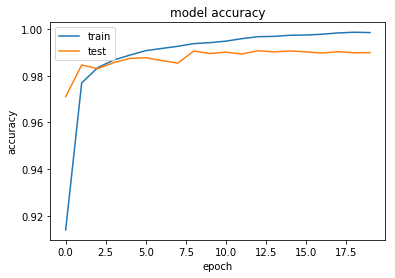

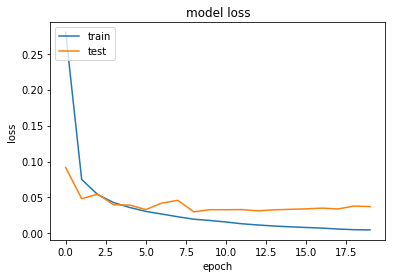

In [8]:
######### Step 4: Traning the Model ###########
history = model.fit(x_train, y_train,  
     batch_size=batch_size,  
     epochs=epochs,  
     verbose=1,  
     validation_data=(x_test, y_test))  
score = model.evaluate(x_test, y_test, verbose=0)  
print('Test loss:', score[0])  
print('Test accuracy:', score[1])  
print(history.history.keys())  
# summarize history for accuracy  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  
# summarize history for loss  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()